<a href="https://colab.research.google.com/github/Adhira-Deogade/INFO-7374---Assignment-3/blob/master/Expt2_BoW_vectorizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
max_words = 1505
batch_size = 32
epochs = 5

In [0]:
from keras.datasets import imdb

In [4]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [5]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

2 classes


In [6]:
print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Vectorizing sequence data...
x_train shape: (25000, 1505)
x_test shape: (25000, 1505)


In [7]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (25000, 2)
y_test shape: (25000, 2)


In [8]:
print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Building model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 5s 207us/step - loss: 0.3711 - acc: 0.8376 - val_loss: 0.3226 - val_acc: 0.8644
Epoch 2/5
22500/22500 [==============================] - 4s 174us/step - loss: 0.2814 - acc: 0.8812 - val_loss: 0.3385 - val_acc: 0.8628
Epoch 3/5
22500/22500 [==============================] - 4s 174us/step - loss: 0.2275 - acc: 0.9081 - val_loss: 0.3151 - val_acc: 0.8700
Epoch 4/5
22500/22500 [==============================] - 4s 172us/step - loss: 0.1651 - acc: 0.9384 - val_loss: 0.3328 - val_acc: 0.8636
Epoch 5/5
22500/22500 [==============================] - 4s 172us/step - loss: 0.1029 - acc: 0.9640 - val_loss: 0.3545 - val_acc: 0.8720


In [11]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)

25000/25000 [==============================] - 1s 55us/step


In [12]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3572549880886078
Test accuracy: 0.86236


In [0]:
import pandas as pd

In [0]:
dataset = pd.read_csv("cleanedfinancial_data.csv")

In [0]:
dataset.drop(columns="Unnamed: 0", inplace=True)

In [0]:
dataset = dataset[dataset.sentiment!='neutral']

In [17]:
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
data = []

In [0]:
for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]

    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)

    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()

    # tokenising
    tokenized_sms = wt(sms)

    # remove stop words and stemming
 
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(word))

    sms_text = " ".join(sms_processed)
    data.append(sms_text)

In [0]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X_finance = matrix.fit_transform(data).toarray()
y_finance = dataset.iloc[:, 0]

In [0]:

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

In [0]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(y_finance)
y_finance2 = encoder.transform(y_finance)


In [0]:
from keras import utils

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_finance2) + 1

y_finance3 = utils.to_categorical(y_finance2, num_classes)

In [0]:
y_softmax = model.predict(X_finance)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_finance3)):
    probs = y_finance3[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [0]:
text_labels = encoder.classes_ 

In [0]:
import itertools

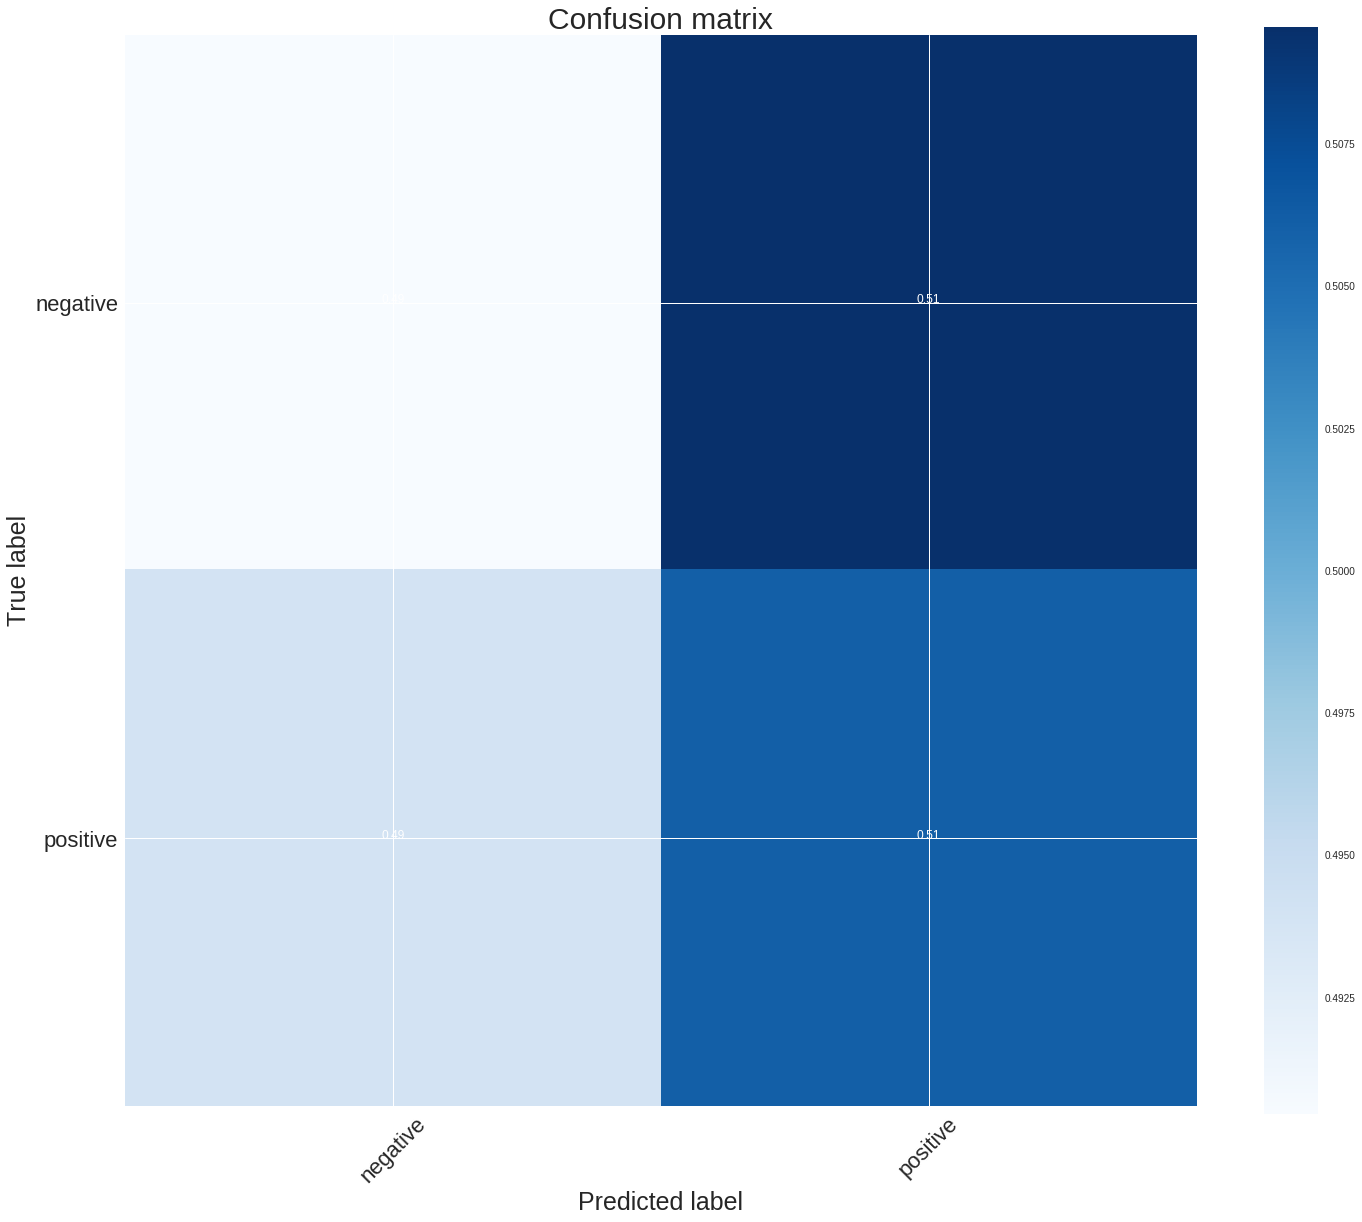

In [31]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [0]:
from sklearn.metrics import accuracy_score, f1_score

In [33]:
f1_score(y_test_1d,y_pred_1d,"macro")

0.6215962441314554

In [34]:
accuracy_score(y_test_1d,y_pred_1d)

0.5030826140567201